In [1]:
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

fibonacci(10)

55

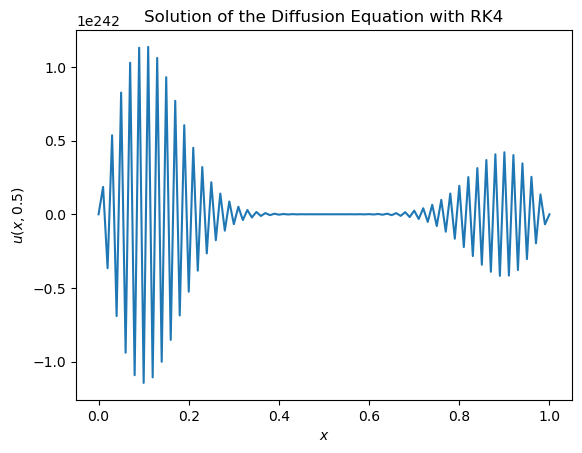

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the diffusion coefficient
D = 0.1

# Define the spatial grid
N = 100
L = 1
dx = L/N
x = np.linspace(0, L, N+1)

# Define the initial condition
u0 = np.exp(-x**2)

# Define the time grid
t = 0
T = 0.5
dt = 0.01

# Define the RK4 function to solve the diffusion equation
def F(u):
    uxx = np.zeros(N+1)
    uxx[1:N] = (u[2:N+1] - 2*u[1:N] + u[0:N-1])/dx**2
    return D*uxx

def RK4_step(u, dt):
    k1 = F(u)
    k2 = F(u + dt/2 * k1)
    k3 = F(u + dt/2 * k2)
    k4 = F(u + dt * k3)
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Solve the diffusion equation using RK4
while t < T:
    u0 = RK4_step(u0, dt)
    t += dt

# Plot the solution
plt.plot(x, u0)
plt.xlabel('$x$')
plt.ylabel('$u(x,0.5)$')
plt.title('Solution of the Diffusion Equation with RK4')
plt.show()